## Numerical Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import yaml
import sys
import os
%matplotlib inline

In [2]:
# get data for visualization
def getAllData(path):
    data = []
    for i in range(1,11):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("File"+str(i),'.yaml'))))))
    return data

In [3]:
# get runtime data for visualization
def getRunTimeData(path):
    data = []
    for i in range(1,31):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("File"+str(i),'.yaml'))))))
    return data

In [4]:
# Collect CPU data for visualization
def getData(path):
    data = []
    cpu = []
    for i in range(1,8):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("AB"+str(i),'.yaml'))))))
        if(data[i-1]['placement']['alloc_node_res'][2]['name'] != 'vnf_user'):
            cpu.append(data[i-1]['placement']['alloc_node_res'][2]['cpu'])
        else:
            cpu.append(data[i-1]['placement']['alloc_node_res'][1]['cpu'])
    return cpu

In [5]:
# Collect placement data
def getPlacementData(path):
    data = []
    placement = []
    for i in range(1,8):
        data.append(yaml.safe_load(open(os.path.join(path,"".join(("AB"+str(i),'.yaml'))))))
        placement.append(data[i-1]['placement']['vnfs'][0]['name']+":"+data[i-1]['placement']['vnfs'][0]['node'])
        placement.append(data[i-1]['placement']['vnfs'][1]['name']+":"+data[i-1]['placement']['vnfs'][1]['node'])
        placement.append(data[i-1]['placement']['vnfs'][2]['name']+":"+data[i-1]['placement']['vnfs'][2]['node'])
    return placement

In [6]:

# CPU vars
CPU_groundTruth = []
CPU_linear = []
CPU_xgboost = []

# Instances vars
I_groundTruth = []
I_linear = []
I_xgboost = []


# End_to_End_Delays vars
D_groundTruth = []
D_linear = []
D_xgboost = []

# Runtime vars
R_groundTruth = []
R_linear = []
R_xgboost = []

# CPU all
CPU_ALL = []

# Instance All
Instance_ALL = []

# Delay All
Delay_ALL = []

# RunTime All
RunTime_ALL = []


In [7]:

# Syn. Log data
inv = getAllData('Analysis/Abilene/fw1chain/inv')
xgb = getAllData('Analysis/Abilene/fw1chain/XGB')
linear = getAllData('Analysis/Abilene/fw1chain/Linear')
nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
datasets = [inv,linear,xgb]
totalCPU = 0.0
max_delay = 0
avg_run = 0.0

CPU_models = [CPU_groundTruth,CPU_linear,CPU_xgboost]
for m in range(0,len(CPU_models)):
    for i in range(0,10):
        #print("\nFile",i+1,"\n")
        totalCPU = 0
        for j in range(0,len(datasets[m][i]['placement']['alloc_node_res'])):
            #print(datasets[m][i]['placement']['alloc_node_res'][j])
            totalCPU += datasets[m][i]['placement']['alloc_node_res'][j]['cpu']
        CPU_models[m].append(totalCPU)
        #print(totalCPU)
CPU_ALL.append(CPU_models)

# Real data 1
CPU_groundTruth = []
CPU_linear = []
CPU_xgboost = []

xgb = getAllData('Analysis/Abilene/fw3chain/nginx_small/XGB')
linear = getAllData('Analysis/Abilene/fw3chain/nginx_small/Linear')
nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
datasets = [linear,xgb]
totalCPU = 0.0
max_delay = 0
avg_run = 0.0

CPU_models = [CPU_linear,CPU_xgboost]
for m in range(0,len(CPU_models)):
    for i in range(0,10):
        #print("\nFile",i+1,"\n")
        totalCPU = 0
        for j in range(0,len(datasets[m][i]['placement']['alloc_node_res'])):
            #print(datasets[m][i]['placement']['alloc_node_res'][j])
            totalCPU += datasets[m][i]['placement']['alloc_node_res'][j]['cpu']
        CPU_models[m].append(totalCPU)
        #print(totalCPU)        
CPU_ALL.append(CPU_models)        

# Real data 2
CPU_groundTruth = []
CPU_linear = []
CPU_xgboost = []

xgb = getAllData('Analysis/Abilene/fw3chain/haproxy_big/XGB')
linear = getAllData('Analysis/Abilene/fw3chain/haproxy_big/Linear')
nodes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
datasets = [linear,xgb]
totalCPU = 0.0
max_delay = 0
avg_run = 0.0

CPU_models = [CPU_linear,CPU_xgboost]
for m in range(0,len(CPU_models)):
    for i in range(0,10):
        #print("\nFile",i+1,"\n")
        totalCPU = 0
        for j in range(0,len(datasets[m][i]['placement']['alloc_node_res'])):
            #print(datasets[m][i]['placement']['alloc_node_res'][j])
            totalCPU += datasets[m][i]['placement']['alloc_node_res'][j]['cpu']
        CPU_models[m].append(totalCPU)
        #print(totalCPU)        
CPU_ALL.append(CPU_models)  
        

In [8]:
# Syn. log data
inv = getAllData('Analysis/Abilene/fw3chain/inv')
xgb = getAllData('Analysis/Abilene/fw3chain/XGB')
linear = getAllData('Analysis/Abilene/fw3chain/Linear')
#gb = getAllData('Analysis/Abilene/fw1chain/gb')

datasets = [inv,linear,xgb]
Instance_models = [I_groundTruth,I_linear,I_xgboost]
End_delays = [D_groundTruth,D_linear,D_xgboost]

for m in range(0,len(Instance_models)):
    for i in range(0,10):
        #print("\nFile",i+1,"\n")
        totalInstances = 0
        max_delay = 0
        totalInstances = datasets[m][i]['metrics']['num_instances']
        max_delay = datasets[m][i]['metrics']['max_endToEnd_delay']
        Instance_models[m].append(totalInstances)
        End_delays[m].append(max_delay)
        #print(max_delay)        
Instance_ALL.append(Instance_models) 
Delay_ALL.append(End_delays)


        
# Real data 1
I_groundTruth = []
I_linear = []
I_xgboost = []

D_groundTruth = []
D_linear = []
D_xgboost = []

xgb = getAllData('Analysis/Abilene/fw3chain/nginx_small/XGB')
linear = getAllData('Analysis/Abilene/fw3chain/nginx_small/Linear')
#gb = getAllData('Analysis/Abilene/fw1chain/gb')

datasets = [linear,xgb]
Instance_models = [I_linear,I_xgboost]
End_delays = [D_linear,D_xgboost]

for m in range(0,len(Instance_models)):
    for i in range(0,10):
        #print("\nFile",i+1,"\n")
        totalInstances = 0
        max_delay = 0
        totalInstances = datasets[m][i]['metrics']['num_instances']
        max_delay = datasets[m][i]['metrics']['max_endToEnd_delay']
        Instance_models[m].append(totalInstances)
        End_delays[m].append(max_delay)
        #print(max_delay)     
Instance_ALL.append(Instance_models) 
Delay_ALL.append(End_delays)
       

# Real data 2
I_groundTruth = []
I_linear = []
I_xgboost = []

D_groundTruth = []
D_linear = []
D_xgboost = []

xgb = getAllData('Analysis/Abilene/fw3chain/haproxy_big/XGB')
linear = getAllData('Analysis/Abilene/fw3chain/haproxy_big/Linear')
#gb = getAllData('Analysis/Abilene/fw1chain/gb')

datasets = [linear,xgb]
Instance_models = [I_linear,I_xgboost]
End_delays = [D_linear,D_xgboost]

for m in range(0,len(Instance_models)):
    for i in range(0,10):
        #print("\nFile",i+1,"\n")
        totalInstances = 0
        max_delay = 0
        totalInstances = datasets[m][i]['metrics']['num_instances']
        max_delay = datasets[m][i]['metrics']['max_endToEnd_delay']
        Instance_models[m].append(totalInstances)
        End_delays[m].append(max_delay)
        #print(max_delay)        
Instance_ALL.append(Instance_models) 
Delay_ALL.append(End_delays)


In [9]:
# Real data
inv = getRunTimeData('Extended/Synthetic_ML_Model_Results/inv/Source9/')
xgb = getRunTimeData('Extended/Synthetic_ML_Model_Results/XGBoost/Source9/')
linear = getRunTimeData('Extended/Synthetic_ML_Model_Results/linear/Source9/')
#gb = getRunTimeData('Extended/Synthetic_ML_Model_Results/gb/Source9/')

datasets = [inv,linear,xgb]
runTimes = [R_groundTruth, R_linear, R_xgboost]
for m in range(0,len(runTimes)):
    avg_run = 0
    for i in range(0,30):
        totalInstances = 0
        avg_run += datasets[m][i]['metrics']['runtime']
        runTimes[m].append(avg_run)
RunTime_ALL.append(runTimes)
        
# Real data 1 
xgb = getRunTimeData('Extended/real_models/nginx/XGB')
linear = getRunTimeData('Extended/real_models/nginx/Linear')
#gb = getRunTimeData('Extended/Synthetic_ML_Model_Results/gb/Source9/')
R_groundTruth = []
R_linear = []
R_xgboost = []

datasets = [linear,xgb]
runTimes = [R_linear, R_xgboost]
for m in range(0,len(runTimes)):
    avg_run = 0
    for i in range(0,30):
        totalInstances = 0
        avg_run += datasets[m][i]['metrics']['runtime']
        runTimes[m].append(avg_run)
RunTime_ALL.append(runTimes)

        
# Real data 2
xgb = getRunTimeData('Extended/real_models/haproxy/XGB')
linear = getRunTimeData('Extended/real_models/haproxy/Linear')
#gb = getRunTimeData('Extended/Synthetic_ML_Model_Results/gb/Source9/')
R_groundTruth = []
R_linear = []
R_xgboost = []

datasets = [linear,xgb]
runTimes = [R_linear, R_xgboost]
for m in range(0,len(runTimes)):
    avg_run = 0
    for i in range(0,30):
        totalInstances = 0
        avg_run += datasets[m][i]['metrics']['runtime']
        runTimes[m].append(avg_run)
RunTime_ALL.append(runTimes)
        

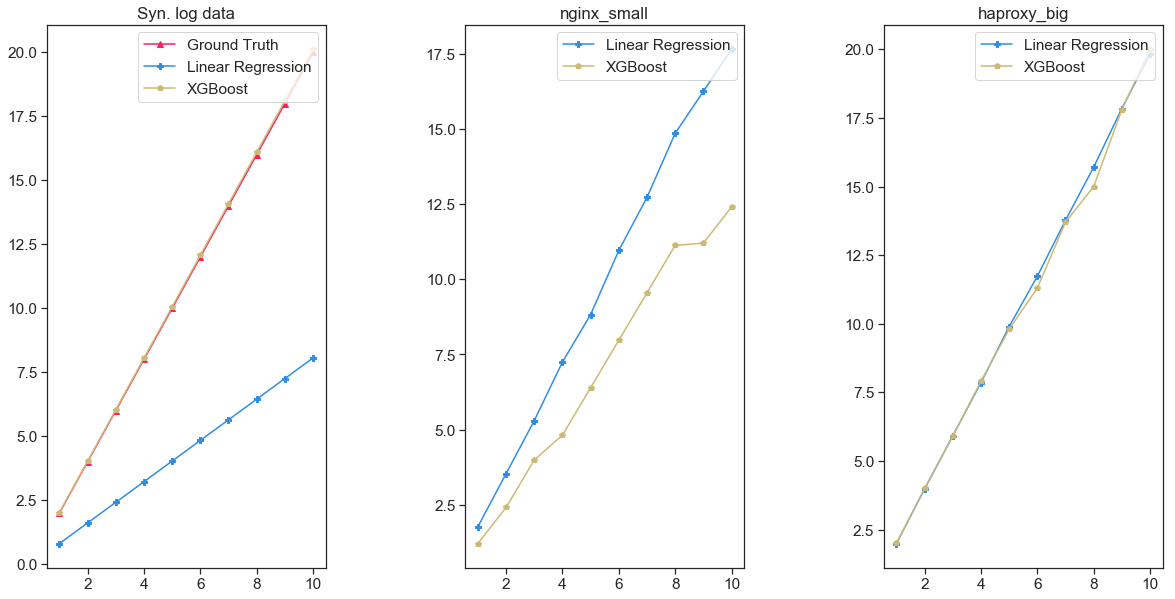

In [10]:
# total CPU plot
modelProperties = [{"name":"Ground Truth","color": "#fe1c64","marker":"^"},{"name":"Linear Regression","color":"#2e8de6","marker":"P"},{"name":"XGBoost","color":"y","marker":"p"}]
realProperties = [{"name":"Linear Regression","color":"#2e8de6","marker":"P"},{"name":"XGBoost","color":"y","marker":"p"}]

datasets = ["Syn. log data", "nginx_small", "haproxy_big"]
sns.set(font_scale=1.4, style="ticks")

fig, axs = plt.subplots(1,3, figsize=(20, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust( wspace=.5)


for i in range(len(CPU_ALL)):
    for j in range(len(CPU_ALL[i])):
        if(i>0):
            axs[i].plot(nodes, CPU_ALL[i][j], color=realProperties[j]["color"], marker=realProperties[j]["marker"], label=realProperties[j]["name"])
        else:    
            axs[i].plot(nodes, CPU_ALL[i][j], color=modelProperties[j]["color"], marker=modelProperties[j]["marker"], label=modelProperties[j]["name"])
    axs[i].set_title(datasets[i])
    axs[i].legend(loc="upper right")





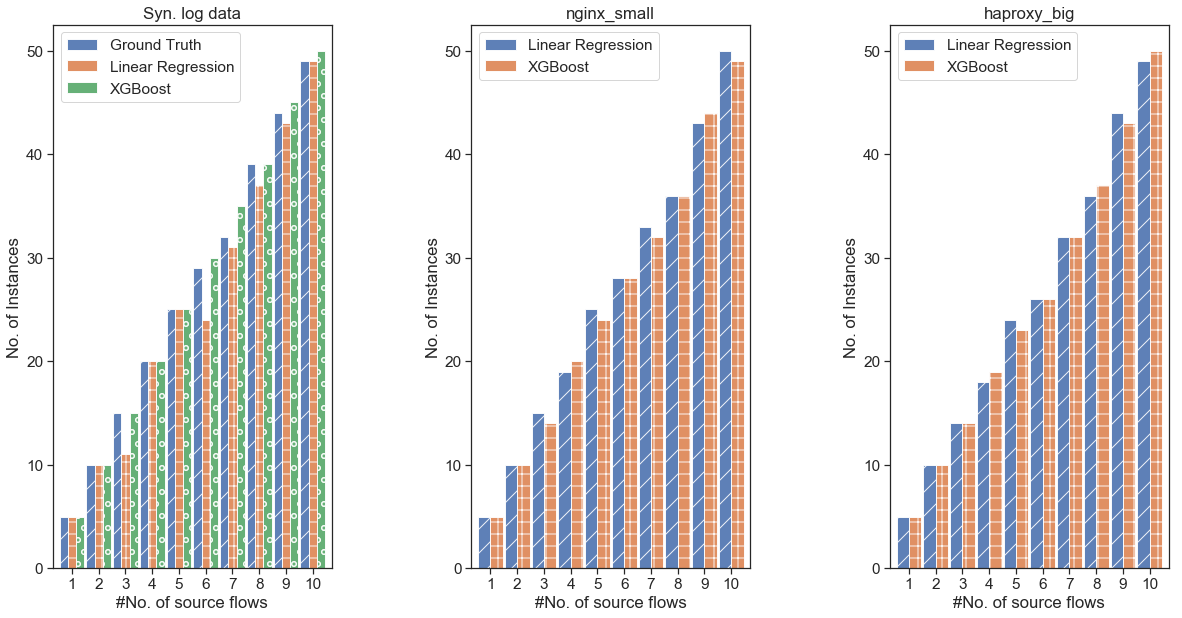

In [11]:
#colors = ["#5DD9C1","#F17300","#E3170A"]
datasets = ["Syn. log data", "nginx_small", "haproxy_big"]
index=[["Ground Truth","Linear Regression", "XGBoost"],["Linear Regression", "XGBoost"],["Linear Regression", "XGBoost"]]

patterns = ['/','+','o']

fig, axes = plt.subplots( ncols=3)
fig.subplots_adjust( wspace=.5)


for i in range(len(Instance_ALL)):
    df=pd.DataFrame(Instance_ALL[i],columns=nodes,index=index[i])
    df = df.T
    ax = df.plot(ax=axes[i],figsize=(20,10),kind='bar',rot=0, width=.93,alpha=.9)
    bars = ax.patches
    ax.set_title(datasets[i])


    hatches = ''.join(h*len(df) for h in patterns)
    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)
        
    ax.set_xlabel('#No. of source flows')
    ax.set_ylabel('No. of Instances')
    
#ax.legend(loc='center right', bbox_to_anchor=(.9,1), ncol=1)

    


    


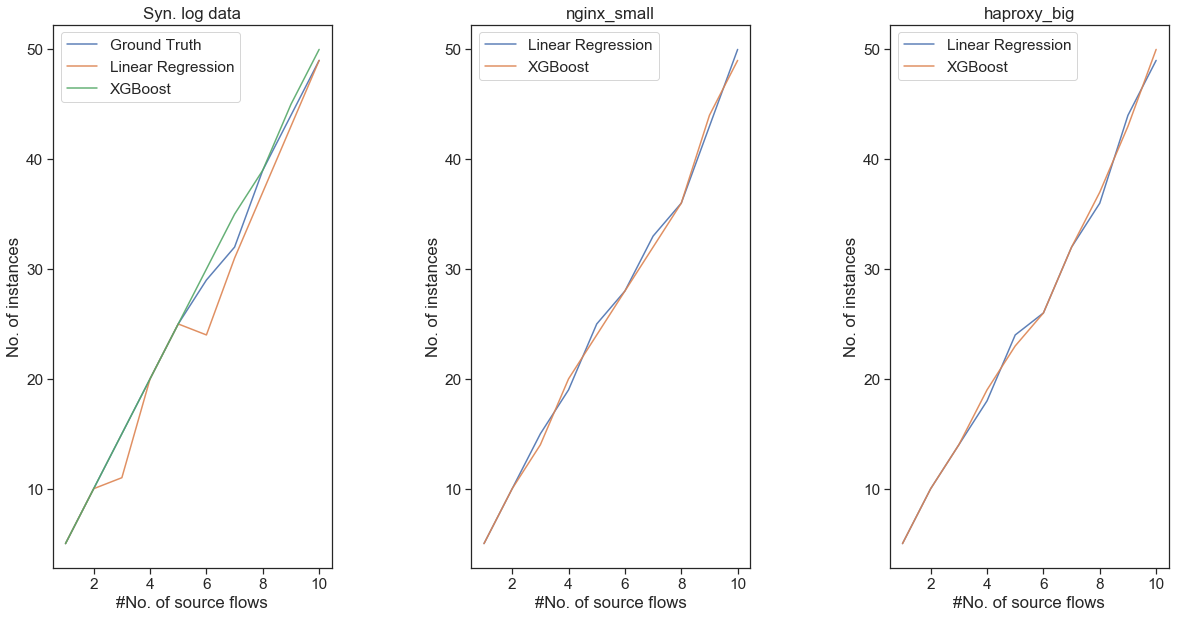

In [12]:
index=[["Ground Truth","Linear Regression", "XGBoost"],["Linear Regression", "XGBoost"],["Linear Regression", "XGBoost"]]
datasets = ["Syn. log data", "nginx_small", "haproxy_big"]


fig, axes = plt.subplots( ncols=3)
fig.subplots_adjust( wspace=.5)

for i in range(len(Delay_ALL)):
    df=pd.DataFrame(Instance_ALL[i],columns=nodes,index=index[i])
    df = df.T
    ax = df.plot(ax=axes[i],figsize=(20,10),kind='line',alpha=.9)
    ax.set_title(datasets[i])
    ax.set_xlabel('#No. of source flows')
    ax.set_ylabel('No. of instances')

    


    


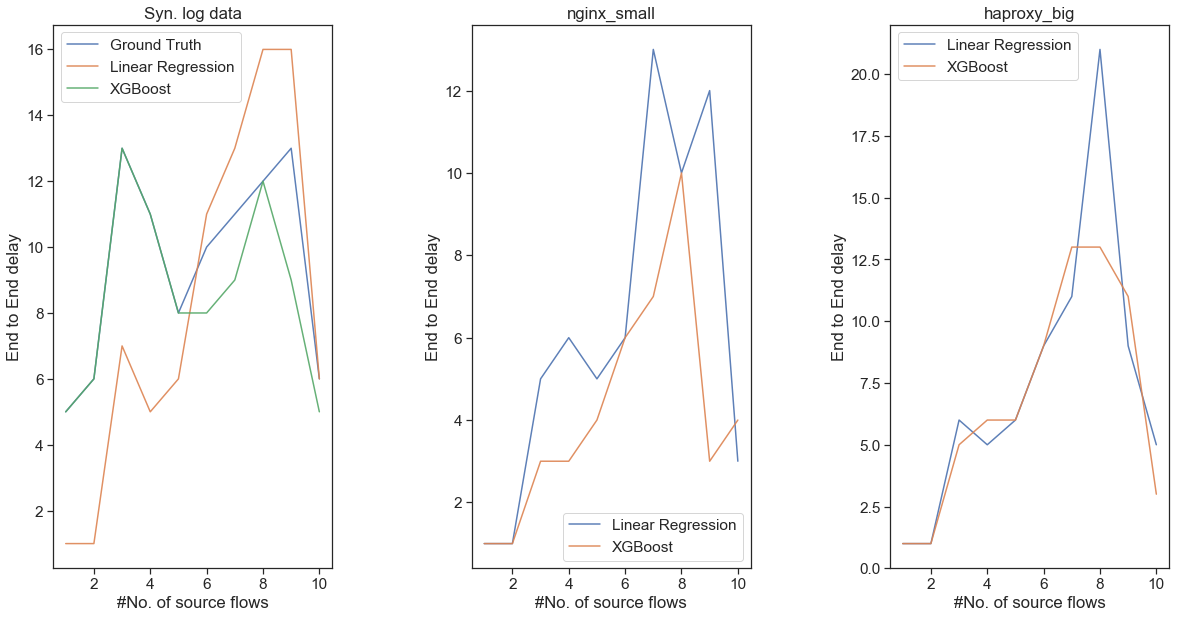

In [13]:
index=[["Ground Truth","Linear Regression", "XGBoost"],["Linear Regression", "XGBoost"],["Linear Regression", "XGBoost"]]
datasets = ["Syn. log data", "nginx_small", "haproxy_big"]


fig, axes = plt.subplots( ncols=3)
fig.subplots_adjust( wspace=.5)

for i in range(len(Delay_ALL)):
    df=pd.DataFrame(Delay_ALL[i],columns=nodes,index=index[i])
    df = df.T
    ax = df.plot(ax=axes[i],figsize=(20,10),kind='line',alpha=.9)
    ax.set_title(datasets[i])
    ax.set_xlabel('#No. of source flows')
    ax.set_ylabel('End to End delay')


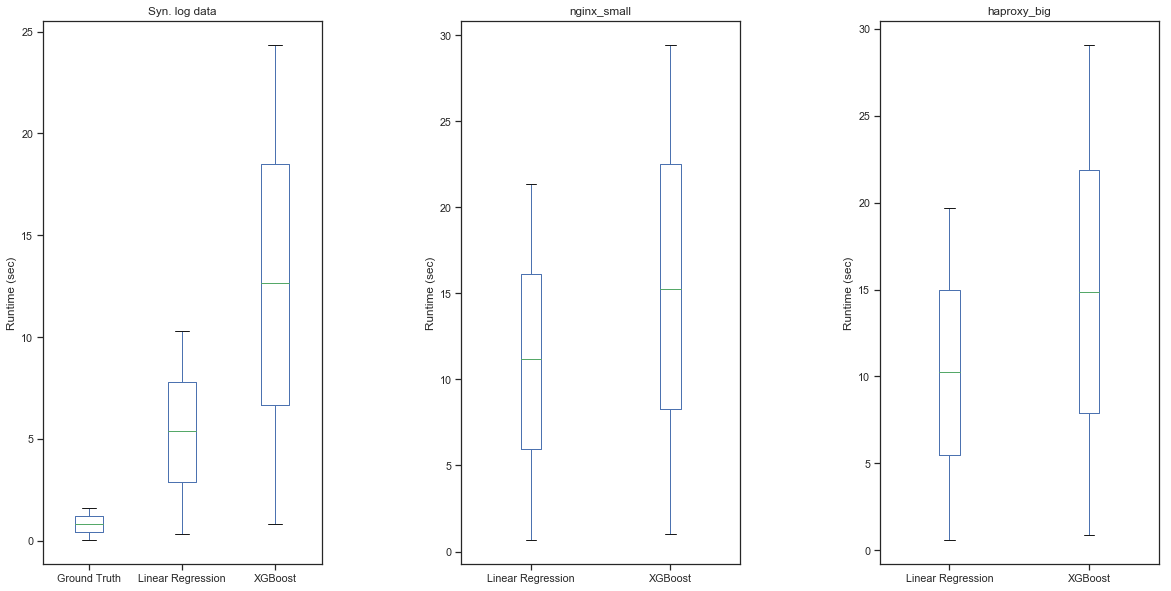

In [14]:
datasets = ["Syn. log data", "nginx_small", "haproxy_big"]
index=[["Ground Truth","Linear Regression", "XGBoost"],["Linear Regression", "XGBoost"],["Linear Regression", "XGBoost"]]


sns.set(font_scale=.98, style="ticks")
fig, axes = plt.subplots( ncols=3)
fig.subplots_adjust( wspace=.5)
for i in range(len(RunTime_ALL)):
    df=pd.DataFrame(RunTime_ALL[i],index=index[i])
    df = df.T
    ax= df.plot(ax=axes[i],figsize=(20,10),kind='box',rot=0)
    ax.set_title(datasets[i])
    ax.set_ylabel('Runtime (sec)')

